# **Predicting Scores for Grade Schoolers**

The district school board is considering implementing an Emperimental Method of math-teaching in its schools. To test the efficacy of Experimental Method, students from 23 schools in the district were tested at the beginning and end of a school year. Entire classrooms were randomly assigned as either the control or the experimental group, with the experimental group being instructed under Experimental Method for the entire school year. 

<br>

---

<br>

The purpose of this study is to assess Experimental Method's ability to increase student testing performances after a year of instruction.

Amongst students instructed under Experimental Method, We will also examine how other variables may affect its ability to improve test scores.



<br>



The insights from these observations will enable us to decide if Experimental Method is worth implementing in the district based on its ability to improve test scores. We may also decide whether implementation should target particular student groups.

<br>

---

<br>

### **Independent Variable:**

Student Level:

*   Post-year-test score (**posttest**): *0 - 100*

<br>

### **Dependent variables:**

School level:

*   School setting (**school_setting**): *Urban, Suburban, Rural*

*   School type (**school_type**): *Public, Non-public*

Classroom level:

*   Teaching method (**teaching_method**): *Standard, Experimental*

*   Number of students in the classroom (**n_student**): *Integer*

Student level:

*   Gender (**gender**): *Male, Female*
  
*   Reduced/Free lunch (**lunch**): *Qualifies, Does not qualify*

*   Pre-year-test score (**pretest**): *0 - 100*

<br>

---

<br>

### **The analysis below will examine the following hypotheses:**

1.   **There is no significant difference in test score improvement (μ = score_improvement) based on the teaching method (Standard vs. Experimental Method).**

  Ho: μ1 - μ2 = 0

  Ha: μ1 - μ2 ≠ 0

2.   **Amongst the experimental group, there is no difference in est score improvement (μ = score_improvement) based on dependent variables.**

  Ho: μ1 - μ2 = 0

  Ha: μ1 - μ2 ≠ 0

  <br>

---

<br>

**Dataset Source:**

https://www.kaggle.com/kwadwoofosu/predict-test-scores-of-students

**More context on dataset:**

https://www.ibm.com/docs/en/spss-statistics/24.0.0?topic=models-analyzing-test-scores-generalized-linear-mixed





## **Importing Libraries, Dataset**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import math

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Import dataset
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/test_scores.csv', delimiter=',')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Preview/Cleaning Dataset**

In [ ]:
# Dataset Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [ ]:
# Removing Columns
concise_df = df.drop(["school"], axis=1)
concise_df = concise_df.drop(["classroom"], axis=1)
concise_df = concise_df.drop(["student_id"], axis=1)

# Establishing new variable "score_improvement"
concise_df = concise_df.assign(score_improvement = (concise_df.posttest - concise_df.pretest))
concise_df.head(2)

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,score_improvement
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0,10.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0,13.0


In [ ]:
# Preview Table
concise_df.head(2)

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,score_improvement
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0,10.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0,13.0


In [ ]:
# Preview Shape
concise_df.columns

Index(['school_setting', 'school_type', 'teaching_method', 'n_student',
       'gender', 'lunch', 'pretest', 'posttest', 'score_improvement'],
      dtype='object')

## **T-Test: Hypothesis 1**

**There is no significant difference in test score improvements (μ = score_improvement) between the control group (μ1) and the experimental group (μ2):**

  Ho: μ1 - μ2 = 0

  Ha: μ1 - μ2 ≠ 0

##### **Examining Hypothesis:**

In [ ]:
# Unique values in "teaching_method"
teaching_method_counts = concise_df['teaching_method'].value_counts()
teaching_method_counts

Standard        1373
Experimental     760
Name: teaching_method, dtype: int64

In [ ]:
# Establishing "control" group: "Standard" values under "teaching_method"
control = concise_df.iloc[(df['teaching_method'] == "Standard").values]

# Establishing "experimental" group: "Experimental" values under "teaching_method"
experimental = concise_df.iloc[(df['teaching_method'] == "Experimental").values]

In [ ]:
# "Control" group statistics
control['score_improvement'].describe()

count    1373.000000
mean       10.053168
std         3.293814
min        -2.000000
25%         8.000000
50%        10.000000
75%        12.000000
max        22.000000
Name: score_improvement, dtype: float64

In [ ]:
# "Experimental" group statistucs
experimental['score_improvement'].describe()

count    760.000000
mean      15.927632
std        3.315834
min        4.000000
25%       14.000000
50%       16.000000
75%       18.000000
max       28.000000
Name: score_improvement, dtype: float64

In [ ]:
# T-Test
stats.ttest_ind(control['score_improvement'], experimental['score_improvement'])

Ttest_indResult(statistic=-39.353255048707595, pvalue=4.575752646832211e-255)

##### **Evaluating Hypothesis**:
---

With a **p-value** of **< 0.05**, we will reject the null hypothesis.

We can now say that students taught under Experimental Method had **significantly higher** test score improvements than students taught under the standard method.

---

##### **Confidence Intervals:**

In [ ]:
# Define function get_95_ci() that calculates standard error, confidence intervals

import math

def get_95_ci(array_1, array_2):
  n_1 = array_1.shape[0]
  mean_1 = array_1['score_improvement'].mean()
  var_1= array_1['score_improvement'].var()
  n_2 = array_2.shape[0]
  mean_2 = array_2['score_improvement'].mean()
  var_2 = array_2['score_improvement'].var()
  std_err_difference = math.sqrt((var_1/n_1)+(var_2/n_2))
  mean_difference = mean_2 - mean_1
  margin_of_error = 1.96 * std_err_difference
  margin_of_error = 1.96 * std_err_difference
  ci_lower = mean_difference - margin_of_error
  ci_upper = mean_difference + margin_of_error
  return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [ ]:
# Using get_95_ci(), calculate confidence intervals
get_95_ci(control, experimental)

'The difference in means at the 95% confidence interval (two-tail) is between 5.581322982253433 and 6.16760368620212.'

##### **Box Plot Visualization:**

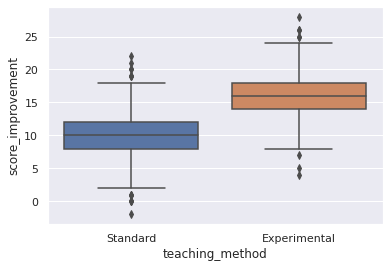

In [ ]:
# Box plot of "score_improvement" scores based on "teaching_method"
sns.boxplot(y="score_improvement", x="teaching_method", data=concise_df)

# **Examining Experimental Group under Qualitative  Variables**

In this section, we will perform a series of T-tests to examine the experimental group and see whether test score improvements are affected by the following variables:

*   School setting
*   School type
*   Gender
*   Reduced/Free lunch






## **T-Test: Hypothesis 2**


**Amongst the experimental group, there is no difference in test score improvements (μ = score_improvement) based on school setting.**

  Ho: μ1 = μ2 = μ3

  Ha: μ1 ≠ μ2 ≠ μ3

##### **Examining Hypothesis:**


In [ ]:
# Unique values in "school_setting"
experimental_school_setting_counts = experimental['school_setting'].value_counts()
experimental_school_setting_counts

Suburban    284
Urban       275
Rural       201
Name: school_setting, dtype: int64

In [ ]:
# Establishing "suburban" group: "Suburban" values under "school_setting"
experimental_suburban = experimental.iloc[(experimental['school_setting'] == "Suburban").values]

# Establishing "urban" group: "Urban" values under "school_setting"
experimental_urban = experimental.iloc[(experimental['school_setting'] == "Urban").values]

# Establishing "rural" group: "Rural" values under "school_setting"
experimental_rural = experimental.iloc[(experimental['school_setting'] == "Rural").values]

In [ ]:
# "Suburban" group statistics
experimental_suburban['score_improvement'].describe()

count    284.000000
mean      15.739437
std        3.365129
min        4.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       25.000000
Name: score_improvement, dtype: float64

In [ ]:
# "Urban" group statistics
experimental_urban['score_improvement'].describe()

count    275.000000
mean      16.160000
std        3.451943
min        5.000000
25%       14.000000
50%       16.000000
75%       18.500000
max       28.000000
Name: score_improvement, dtype: float64

In [ ]:
# "Rural" group statistics
experimental_rural['score_improvement'].describe()

count    201.000000
mean      15.875622
std        3.041291
min        8.000000
25%       14.000000
50%       16.000000
75%       18.000000
max       26.000000
Name: score_improvement, dtype: float64

In [ ]:
# T-Test: "suburban" vs. "urban"
stats.ttest_ind(experimental_suburban['score_improvement'], experimental_urban['score_improvement'])

Ttest_indResult(statistic=-1.4586037366562143, pvalue=0.14523784986831173)

In [ ]:
# T-Test: "suburban" vs. "rural"
stats.ttest_ind(experimental_suburban['score_improvement'], experimental_rural['score_improvement'])

Ttest_indResult(statistic=-0.4567160317905362, pvalue=0.6480804851932769)

In [ ]:
# T-Test: "urban" vs. "rural"
stats.ttest_ind(experimental_urban['score_improvement'], experimental_rural['score_improvement'])

Ttest_indResult(statistic=0.9328885411604845, pvalue=0.3513524619886722)

##### **Evaluating Hypothesis**:
---

With a **p-value** of **> 0.05**, we will accept the null hypothesis.

We can now say that amongst the students taught under Experimental Method, there was **no significant difference** in test score improvements between suburban, urba, and rural students.

---

##### **Confidence Intervals:**

In [ ]:
# Using get_95_ci(), calculate confidence intervals
print("Suburban vs. Urban:")
print(get_95_ci(experimental_suburban, experimental_urban))

print("Suburban vs. Rural:")
print(get_95_ci(experimental_suburban, experimental_rural))

print("Urban vs. Rural:")
print(get_95_ci(experimental_urban, experimental_rural))

Suburban vs. Urban:
The difference in means at the 95% confidence interval (two-tail) is between -0.1448011843430459 and 0.9859279449064262.
Suburban vs. Rural:
The difference in means at the 95% confidence interval (two-tail) is between -0.4382343357129038 and 0.7106048773708104.
Urban vs. Rural:
The difference in means at the 95% confidence interval (two-tail) is between -0.8702436119103754 and 0.30148739300490157.


##### **Box Plot Visualization:**

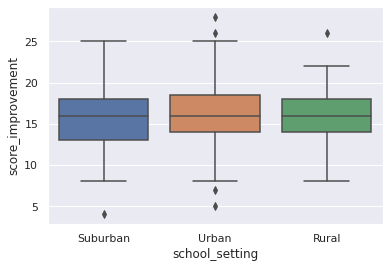

In [ ]:
# Box plot of "score_improvement" scores based on "school_setting"
sns.boxplot(y="score_improvement", x="school_setting", data=experimental)

## **T-Test: Hypothesis 3**


**Amongst the experimental group, there is no difference in test score improvements (μ = score_improvement) based on school type.**

  Ho: μ1 - μ2 = 0

  Ha: μ1 - μ2 ≠ 0

##### **Examining Hypothesis:**


In [ ]:
# Unique values in "school_type"
experimental_school_type_counts = experimental['school_type'].value_counts()
experimental_school_type_counts

Public        495
Non-public    265
Name: school_type, dtype: int64

In [ ]:
# Establishing "public" group: "Public" values under "school_type"
experimental_public = experimental.iloc[(experimental['school_type'] == "Public").values]

# Establishing "non_public" group: "Non-public" values under "school_type"
experimental_non_public = experimental.iloc[(experimental['school_type'] == "Non-public").values]

In [ ]:
# "Public" group statistics
experimental_public['score_improvement'].describe()

count    495.000000
mean      16.125253
std        3.302629
min        4.000000
25%       14.000000
50%       16.000000
75%       18.000000
max       28.000000
Name: score_improvement, dtype: float64

In [ ]:
# "Non_public" group statistics
experimental_non_public['score_improvement'].describe()

count    265.000000
mean      15.558491
std        3.315107
min        5.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       24.000000
Name: score_improvement, dtype: float64

In [ ]:
# T-Test
stats.ttest_ind(experimental_public['score_improvement'], experimental_non_public['score_improvement'])

Ttest_indResult(statistic=2.2515823296596498, pvalue=0.024634254254775712)

##### **Evaluating Hypothesis**:
---

With a **p-value** of **< 0.05**, we will reject the null hypothesis.

We can now say that amongst students taught under Experimental Method, public school attendees had **significantly higher** test score improvements than their non-public school attending peers.

---

##### **Confidence Intervals:**

In [ ]:
# Using get_95_ci(), calculate confidence intervals
get_95_ci(experimental_public, experimental_non_public)

'The difference in means at the 95% confidence interval (two-tail) is between -1.060691779991628 and -0.07283213843794656.'

##### **Box Plot Visualization:**

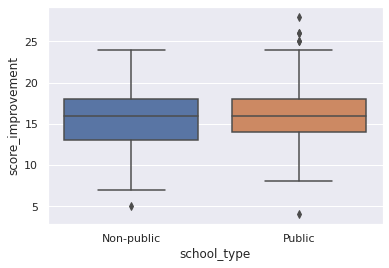

In [ ]:
# Box plot of "score_improvement" scores based on "school_type"
sns.boxplot(y="score_improvement", x="school_type", data=experimental)

##### **Non-Public Experimental Group vs. Non-public Control Group:**

In [ ]:
# Establishing "non_public" control group: "Non-public" values under "school_type"
control_non_public = control.iloc[(control['school_type'] == "Non-public").values]

# "non-public" control group statistics
control_non_public['score_improvement'].describe()

count    286.000000
mean      10.066434
std        3.295791
min        0.000000
25%        8.000000
50%       10.000000
75%       12.000000
max       22.000000
Name: score_improvement, dtype: float64

In [ ]:
# T-Test
stats.ttest_ind(experimental_non_public['score_improvement'], control_non_public['score_improvement'],)

Ttest_indResult(statistic=19.488633983000096, pvalue=1.1017637435868445e-64)

##### **Observation:**
---

Although experimental group non-public school attendees saw a smaller benefit than their public school counter parts, their test score improvements were still **significantly higher** than control group non-public school attendees, with a **p-value** of **< 0.05**.

---



## **T-Test: Hypothesis 4**

**Amongst the experimental group, there is no difference in test score improvements (μ = score_improvement) based on gender.**

  Ho: μ1 - μ2 = 0

  Ha: μ1 - μ2 ≠ 0

##### **Examining Hypothesis:**

In [ ]:
# Unique values in "gender"
experimental_gender_counts = experimental['gender'].value_counts()
experimental_gender_counts

Male      394
Female    366
Name: gender, dtype: int64

In [ ]:
# Establishing "male" group: "Male" values under "gender"
experimental_male = experimental.iloc[(experimental['gender'] == "Male").values]

# Establishing "female" group: "Female" values under "gender"
experimental_female = experimental.iloc[(experimental['gender'] == "Female").values]

In [ ]:
# "Male" group statistics
experimental_male['score_improvement'].describe()

count    394.000000
mean      15.972081
std        3.406584
min        4.000000
25%       14.000000
50%       16.000000
75%       18.000000
max       28.000000
Name: score_improvement, dtype: float64

In [ ]:
# "Non_public" group statistics
experimental_female['score_improvement'].describe()

count    366.000000
mean      15.879781
std        3.219253
min        8.000000
25%       14.000000
50%       16.000000
75%       18.000000
max       25.000000
Name: score_improvement, dtype: float64

In [ ]:
# T-Test
stats.ttest_ind(experimental_male['score_improvement'], experimental_female['score_improvement'])

Ttest_indResult(statistic=0.3832177271345693, pvalue=0.7016657823494656)

##### **Evaluating Hypothesis**:
---

With a **p-value** of **> 0.05**, we will accept the null hypothesis.

We can now say that amongst the students taught under Experimental Method, there was **no significant difference** in test score improvements between male students and female students.

---

##### **Confidence Intervals:**

In [ ]:
# Using get_95_ci(), calculate confidence intervals
get_95_ci(experimental_male, experimental_female)

'The difference in means at the 95% confidence interval (two-tail) is between -0.5633921029739185 and 0.3787925079557518.'

##### **Box Plot Visualization:**

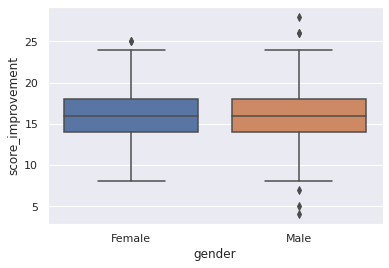

In [ ]:
# Box plot of "score_improvement" scores based on "gender"
sns.boxplot(y="score_improvement", x="gender", data=experimental)

## **T-Test: Hypothesis 5**

**Amongst the experimental group, there is no difference in test score improvements (μ = score_improvement) based on reduced/free lunch eligibility.**

  Ho: μ1 - μ2 = 0

  Ha: μ1 - μ2 ≠ 0

##### **Examining Hypothesis:**

In [ ]:
# Unique values in "lunch"
experimental_lunch_counts = experimental['lunch'].value_counts()
experimental_lunch_counts

Does not qualify                    442
Qualifies for reduced/free lunch    318
Name: lunch, dtype: int64

In [ ]:
# Establishing "not_qualify" group: "Does not qualify" values under "lunch"
experimental_not_qualify = experimental.iloc[(experimental['lunch'] == "Does not qualify").values]

# Establishing "qualify" group: "Qualifies for reduced/free lunch" values under "lunch"
experimental_qualify = experimental.iloc[(experimental['lunch'] == "Qualifies for reduced/free lunch").values]

In [ ]:
# "not_qualify" group statistics
experimental_not_qualify['score_improvement'].describe()

count    442.000000
mean      15.776018
std        3.459787
min        4.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       26.000000
Name: score_improvement, dtype: float64

In [ ]:
# "qualify" group statistics
experimental_qualify['score_improvement'].describe()

count    318.000000
mean      16.138365
std        3.097731
min        8.000000
25%       14.000000
50%       16.000000
75%       18.000000
max       28.000000
Name: score_improvement, dtype: float64

In [ ]:
# T-Test
stats.ttest_ind(experimental_not_qualify['score_improvement'], experimental_qualify['score_improvement'])

Ttest_indResult(statistic=-1.487290730644386, pvalue=0.13735388705256357)

##### **Evaluating Hypothesis**:
---

With a **p-value** of **> 0.05**, we will accept the null hypothesis.

We can now say that amongst the students taught under Experimental Method, there was **no significant difference** in test score improvements between students who qualify and students who do not qualify for reduced/free lunches.

---

##### **Confidence Intervals:**

In [ ]:
# Using get_95_ci(), calculate confidence intervals
get_95_ci(experimental_not_qualify, experimental_qualify)

'The difference in means at the 95% confidence interval (two-tail) is between -0.10665324946811666 and 0.8313466101215174.'

##### **Box Plot Visualization:**

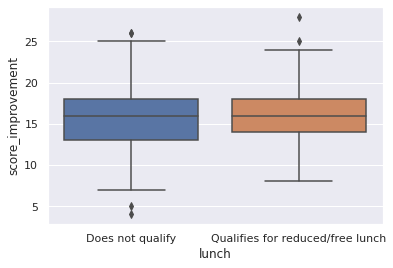

In [ ]:
# Box plot of "score_improvement" scores based on "lunch"
sns.boxplot(y="score_improvement", x="lunch", data=experimental)

# **Examining Experimental Group under Quantitative Variables**

In this section, we will perform a series of T-tests to examine the experimental group and see whether test score improvements are affected by the following variables:

*   Number of students in the classroom
*   Pre-year-test score
*   Post-year-test score

##### **Statistics:**

In [ ]:
# Statistcs of quantitative variables
experimental[['n_student', 'pretest', 'posttest', 'score_improvement']].describe()

,n_student,pretest,posttest,score_improvement
count,760.000000,760.000000,760.000000,760.000000
mean,22.194737,57.055263,72.982895,15.927632
std,4.870548,14.019076,13.732566,3.315834
min,14.000000,22.000000,39.000000,4.000000
25%,18.000000,45.000000,61.000000,14.000000
50%,22.000000,59.000000,75.000000,16.000000
75%,27.000000,67.000000,83.000000,18.000000
max,30.000000,93.000000,100.000000,28.000000


##### **Correlations:**

In [ ]:
# Pearson correlation coeffitients between variables
experimental[['n_student', 'pretest', 'posttest', 'score_improvement']].corr()

,n_student,pretest,posttest,score_improvement
n_student,1.000000,-0.620785,-0.615305,0.076336
pretest,-0.620785,1.000000,0.971658,-0.203785
posttest,-0.615305,0.971658,1.000000,0.033421
score_improvement,0.076336,-0.203785,0.033421,1.000000


##### **Seaborn Pair Plot Visualization:**

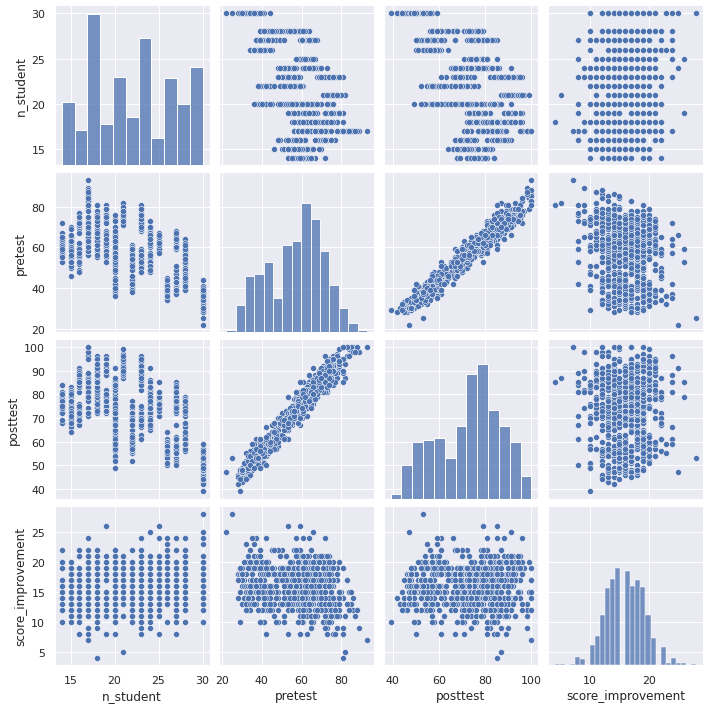

In [ ]:
# Seaborn pair plot for pair-wise relationships between variables
sns.pairplot(experimental)

##### **Observations:**
---

**Strong correlations:**

*   n_student and pretest (-0.620785)
*   n_student and posttest(-0.615305)
*   pretest and posttest (0.971658)

**Weak correlations:**

*   score_improvement and pretest (-0.203785)

---



##### **Pearson Correlation Tests:**

In [ ]:
# Pearson correlation test for "n_student" and "pretest"
stats.pearsonr(experimental['n_student'], experimental['pretest'])

(-0.6207853753600057, 3.560628046203072e-82)

In [ ]:
# Pearson correlation test for "n_student" and "posttest"
stats.pearsonr(experimental['n_student'], experimental['posttest'])

(-0.6153052519510168, 2.2882081410886734e-80)

In [ ]:
# Pearson correlation test for "pretest" and "postest"
stats.pearsonr(experimental['pretest'], experimental['posttest'])

(0.9716580413570177, 0.0)

---

With a **Pearson coefficient *r*** of **> 0.95**, we can say that test performances at both the beginning and end the year/trial are closely correlated.

With **p values** of **< 0.05**, we can say that the number of students in the classroom is significantly negatively correlated with test performance.



---




In [ ]:
# Pearson correlation test for "score_improvement" and "pretest"
stats.pearsonr(experimental['score_improvement'], experimental['pretest'])

(-0.20378515519188448, 1.4421580910262455e-08)

---

With a **p value** of **< 0.05**, we can say that test score improment is significantly negatively correlated with pre-year-test scores.

---




In [ ]:
# Pearson correlation test for "score_improvement" and "n_student"
stats.pearsonr(experimental['score_improvement'], experimental['n_student'])

(0.07633594916774893, 0.035374631278120405)

---

With a **p value** of **< 0.05**, we can say that test score improvement is significantly correlated with the number of students in the classroom.

---

# **Final Observations**


Students benefited significantly under Experimental Method in terms of higher test score improvements.

Students of varying school settings, genders, and reduced/free lunch eligibilities experienced Experimental Method's benefit all the same.

Public school attendees, and those from larger classrooms saw greater benefits than their peers from non-public schools and smaller classroom sizes.

Students who were behind at the beginning of the year also saw greater benefits.

<br>

---

<br>

#### **My recommentation: A blanket implementation of Experimental Method over the entire district.**

Although there were slight variations between student groups in terms of benefit intensity, every student group were significantly better off than their control group peers. 